In [182]:
import pandas as pd
import plotly.express as px
import folium
import json
from IPython.display import IFrame  
import plotly.io as pio  
from html2image import Html2Image

In [183]:
df=pd.read_csv(r'Global_Cybersecurity_Threats_2015-2024.csv')
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [184]:
#COUNT DUPLICATES
df.duplicated().sum()

np.int64(0)

In [185]:
#COUNT NULL VALUES PER COLUMN
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [187]:
#CHANGE YEAR COLUMN FORMAT FROM INT64 TO STR
df['Year'] = df['Year'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   object 
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 234.5+ KB


In [188]:
#COUNT NUMBER OF COLUMNS AND ROWS
df.shape

(3000, 10)

**KEY FINDINGS / RESULTS | FINANCIAL IMPACT AND TRENDS**

In [189]:
#DATAFRAME FOR ANNUAL FINANCIAL LOSS
df_financial_loss_annual = df.groupby('Year')['Financial Loss (in Million $)'].sum().reset_index()
df_financial_loss_annual['Financial Loss'] = (df_financial_loss_annual['Financial Loss (in Million $)']*1e6).round(2)
df_financial_loss_annual['Financial Loss (in Billion $)'] = (df_financial_loss_annual['Financial Loss (in Million $)']/1e3).round(2)
df_financial_loss_annual

,Year,Financial Loss (in Million $),Financial Loss,Financial Loss (in Billion $)
0,2015,14510.21,1.451021e+10,14.51
1,2016,13947.26,1.394726e+10,13.95
2,2017,16261.68,1.626168e+10,16.26
3,2018,14720.48,1.472048e+10,14.72
4,2019,13134.69,1.313469e+10,13.13
5,2020,15767.95,1.576795e+10,15.77
6,2021,15873.41,1.587341e+10,15.87
7,2022,15870.86,1.587086e+10,15.87
8,2023,15958.08,1.595808e+10,15.96
9,2024,15434.29,1.543429e+10,15.43


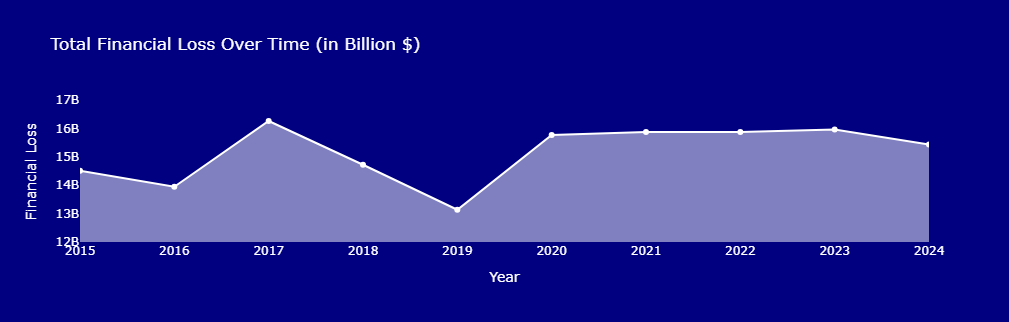

In [222]:
# AREA CHART OF TOTAL FINANCIAL LOSS OVER TIME
fig_financial_loss_annual = px.area(df_financial_loss_annual, x='Year', y='Financial Loss', 
                                    title= "<span style='color:white;'>Total Financial Loss Over Time (in Billion $)</span>",
                                    markers=True, color_discrete_sequence=['white'],
                                    width=1250, height=300)
fig_financial_loss_annual.update_layout(plot_bgcolor='Navy', paper_bgcolor='Navy',
                                       yaxis=dict(range=[12000000000,17000000000], showgrid=False),
                                       xaxis=dict(showgrid=False), font=dict(color='white'))

fig_financial_loss_annual.show()

fig_financial_loss_annual.write_image('fig_financial_loss_annual.png')

In [223]:
#DATAFRAME FOR TOTAL FINANCIAL LOSS BY ATTACK TYPE
df_attack_type_finloss_total = df.groupby('Attack Type')['Financial Loss (in Million $)'].sum().sort_values(ascending=True).reset_index()
df_attack_type_finloss_total['Financial Loss'] = (df_attack_type_finloss_total['Financial Loss (in Million $)']*1e6).round(2)
df_attack_type_finloss_total['Financial Loss (in Billion $)'] = (df_attack_type_finloss_total['Financial Loss (in Million $)']/1e3).round(2)
df_attack_type_finloss_total

,Attack Type,Financial Loss (in Million $),Financial Loss,Financial Loss (in Billion $)
0,Man-in-the-Middle,23550.87,2.355087e+10,23.55
1,Malware,23967.95,2.396795e+10,23.97
2,Ransomware,24479.32,2.447932e+10,24.48
3,SQL Injection,25156.56,2.515656e+10,25.16
4,Phishing,26693.29,2.669329e+10,26.69
5,DDoS,27630.92,2.763092e+10,27.63


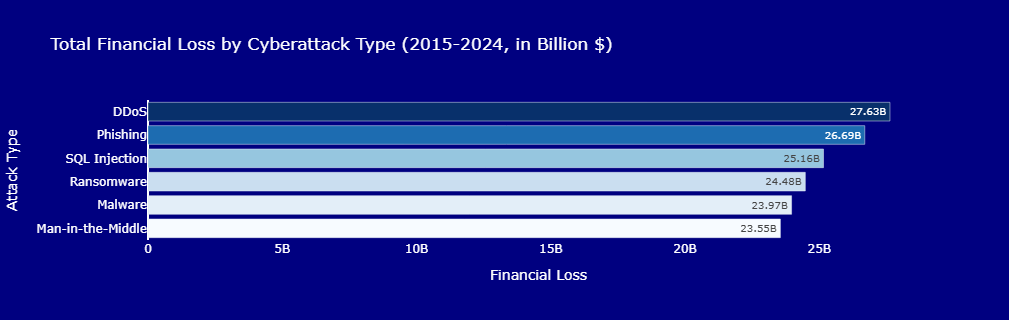

In [224]:
# BAR GRAPH OF TOTAL FINANCIAL LOSS BY ATTACK TYPE
fig_finloss_attacktype = px.bar(df_attack_type_finloss_total, y='Attack Type', x='Financial Loss', 
                                    title= "<span style='color:white;'>Total Financial Loss by Cyberattack Type (2015-2024, in Billion $)</span>",
                                    color='Financial Loss', color_continuous_scale='Blues', 
                                    text=df_attack_type_finloss_total['Financial Loss (in Billion $)'].apply(lambda x: f"{x}B"),
                                    width=620, height=320)
fig_finloss_attacktype.update_layout(plot_bgcolor='Navy', paper_bgcolor='Navy',
                                       yaxis=dict(showgrid=False),
                                       xaxis=dict(showgrid=False), font=dict(color='white'),
                                    coloraxis_showscale=False)

fig_finloss_attacktype.show()

fig_finloss_attacktype.write_image('fig_finloss_attacktype.png', width=620, height=320)

In [225]:
#DATAFRAME OF FINANCIAL LOSS BY INDUSTRY
df_target_industry_finloss_total = df.groupby(['Target Industry','Year'])['Financial Loss (in Million $)'].sum().reset_index()
df_target_industry_finloss_total['Financial Loss'] = (df_target_industry_finloss_total['Financial Loss (in Million $)']*1e6).round(2)
df_target_industry_finloss_total['Financial Loss (in Billion $)'] = (df_target_industry_finloss_total['Financial Loss (in Million $)']/1e3).round(2)
df_target_industry_finloss_total

,Target Industry,Year,Financial Loss (in Million $),Financial Loss,Financial Loss (in Billion $)
0,Banking,2015,2189.36,2.189360e+09,2.19
1,Banking,2016,1871.24,1.871240e+09,1.87
2,Banking,2017,2220.96,2.220960e+09,2.22
3,Banking,2018,2468.82,2.468820e+09,2.47
4,Banking,2019,2117.61,2.117610e+09,2.12
...,...,...,...,...,...
65,Telecommunications,2020,1970.72,1.970720e+09,1.97
66,Telecommunications,2021,2726.83,2.726830e+09,2.73
67,Telecommunications,2022,2385.68,2.385680e+09,2.39
68,Telecommunications,2023,2189.73,2.189730e+09,2.19


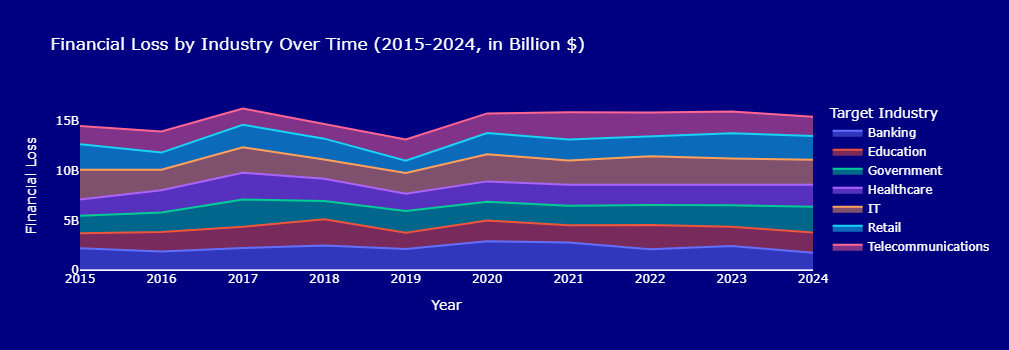

In [226]:
#AREA CHART OF FINANCIAL LOSS BY INDUSTRY OVER-TIME 
fig_target_industry_finloss_total = px.area(df_target_industry_finloss_total, y='Financial Loss', x='Year', 
                                         title = 'Financial Loss by Industry Over Time (2015-2024, in Billion $)', 
                                         color='Target Industry',
                                         #text = (df_target_industry_finloss_total['Financial Loss (in Billion $)'].apply(lambda x:f"{x}B")),
                                         width = 620, height=350)

fig_target_industry_finloss_total.update_layout(coloraxis_showscale=False, plot_bgcolor='navy', paper_bgcolor='navy', xaxis=dict(showgrid=False),
                                                yaxis=dict(showgrid=False),
                                                font=dict(color='white'))
fig_target_industry_finloss_total.show()

fig_target_industry_finloss_total.write_image('fig_target_industry_finloss_total.png')

In [227]:
#DATAFRAME OF TOTAL FINANCIAL LOSS BY COUNTRY
df_country_finloss_total = df.groupby('Country')['Financial Loss (in Million $)'].sum().reset_index()
df_country_finloss_total['Financial Loss'] = (df_country_finloss_total['Financial Loss (in Million $)']*1e3).round(2)
df_country_finloss_total['Financial Loss (in Billion $)'] = (df_country_finloss_total['Financial Loss (in Million $)']/1e3).round(2)
df_country_finloss_total['Country']= df_country_finloss_total['Country'].replace({'USA':'United States of America', 'UK':'United Kingdom'})
df_country_finloss_total

,Country,Financial Loss (in Million $),Financial Loss,Financial Loss (in Billion $)
0,Australia,15403.00,15403000.0,15.40
1,Brazil,15782.62,15782620.0,15.78
2,China,13714.47,13714470.0,13.71
3,France,14972.28,14972280.0,14.97
4,Germany,15793.24,15793240.0,15.79
5,India,14566.12,14566120.0,14.57
6,Japan,15197.34,15197340.0,15.20
7,Russia,14734.73,14734730.0,14.73
8,United Kingdom,16502.99,16502990.0,16.50
9,United States of America,14812.12,14812120.0,14.81


In [228]:
#CHOROPLETH MAP OF TOTAL FINANCIAL LOSS BY COUNTRY

import json
import folium

# Step 1: Load GeoJSON data
with open("custom.geo.json", "r", encoding="utf-8") as geojson_file:
    geojson_data = json.load(geojson_file)

# Step 2: Initialize the map
choropleth_map_finloss = folium.Map(location=[10, 0], zoom_start=2, tiles="Cartodb Positron")

# Step 3: Add Choropleth layer
folium.Choropleth(
    geo_data=geojson_data,
    data=df_country_finloss_total,
    columns=["Country", "Financial Loss (in Million $)"],
    key_on="feature.properties.name",
    fill_color='Blues',
    nan_fill_color="transparent",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Financial Loss (in Million $)"
).add_to(choropleth_map_finloss)

# Step 4: Add GeoJSON layer for tooltips
folium.GeoJson(
    geojson_data,
    style_function=lambda x: {
        "fillColor": "transparent",
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["name"],
        aliases=["Country: "],
        localize=True,
    ),
).add_to(choropleth_map_finloss)

# Step 5: Define top 10 affected countries
countries_finloss = [
    {"name": "Australia", "lat": -25.2744, "lon": 133.7751, "callbox_position": "right", "Financial Loss (in Billion $)": "15.40B"},
    {"name": "Brazil", "lat": -14.2350, "lon": -51.9253, "callbox_position": "right", "Financial Loss (in Billion $)": "15.78B"},
    {"name": "China", "lat": 35.8617, "lon": 104.1954, "callbox_position": "left", "Financial Loss (in Billion $)": "13.71B"},
    {"name": "France", "lat": 46.6034, "lon": 1.8883, "callbox_position": "left", "Financial Loss (in Billion $)": "14.97B"},
    {"name": "Germany", "lat": 51.1657, "lon": 10.4515, "callbox_position": "right", "Financial Loss (in Billion $)": "15.79B"},
    {"name": "India", "lat": 20.5937, "lon": 78.9629, "callbox_position": "right", "Financial Loss (in Billion $)": "14.57B"},
    {"name": "Japan", "lat": 36.2048, "lon": 138.2529, "callbox_position": "right", "Financial Loss (in Billion $)": "15.20B"},
    {"name": "Russia", "lat": 61.5240, "lon": 105.3188, "callbox_position": "right", "Financial Loss (in Billion $)": "14.73B"},
    {"name": "United Kingdom", "lat": 55.3781, "lon": -3.4360, "callbox_position": "left", "Financial Loss (in Billion $)": "16.50B"},
    {"name": "United States of America", "lat": 37.0902, "lon": -95.7129, "callbox_position": "left", "Financial Loss (in Billion $)": "14.81B"}
]

# Step 6: Add callout boxes and connecting lines
for country in countries_finloss:
    offset_lat = country["lat"] + 5
    offset_lon = country["lon"] + (40 if country["callbox_position"] == "right" else -80)

    box_html = f"""
    <div style="
        background-color: white;
        border: 1px solid black;
        border-radius: 5px;
        padding: 10px;
        width: 250px;
        height:30px;
        display:flex;
        align-items:center;
        font-size:14px;
        justify-content: center;
        box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
        <b>{country['name']} ({country['Financial Loss (in Billion $)']})</b>
    </div>
    """

    folium.Marker(
        location=[offset_lat, offset_lon],
        icon=folium.DivIcon(html=box_html)
    ).add_to(choropleth_map_finloss)

    folium.PolyLine(
        locations=[[country["lat"], country["lon"]], [offset_lat, offset_lon]],
        color="black",
        weight=1
    ).add_to(choropleth_map_finloss)

# Step 7: Add summary callout box in ocean area
summary_html = """
<div style="background-color: white; border-radius: 10px; padding: 10px; width: 400px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.3);">
    <h4 style="margin: 0; text-align: center; color:dodgerblue;"><b>FINANCIAL LOSS BY COUNTRY</b><br>(2011-2024, in Billion $)</h4>
    <table style="width: 100%; border-collapse: collapse; font-size: 14px;">
        <thead>
            <tr style="border-bottom: 1px solid #ddd; text-align: left;">
                <th style="width: 15%;">Rank</th>
                <th style="width: 50%;">Country</th>
                <th style="width: 35%;">Loss (Billion $)</th>
            </tr>
        </thead>
        <tbody>
            <tr><td>1</td><td>United Kingdom</td><td>16.50B</td></tr>
            <tr><td>2</td><td>Brazil</td><td>15.78B</td></tr>
            <tr><td>3</td><td>Germany</td><td>15.79B</td></tr>
            <tr><td>4</td><td>Australia</td><td>15.40B</td></tr>
            <tr><td>5</td><td>Japan</td><td>15.20B</td></tr>
            <tr><td>6</td><td>France</td><td>14.97B</td></tr>
            <tr><td>7</td><td>Russia</td><td>14.73B</td></tr>
            <tr><td>8</td><td>United States of America</td><td>14.81B</td></tr>
            <tr><td>9</td><td>India</td><td>14.57B</td></tr>
            <tr><td>10</td><td>China</td><td>13.71B</td></tr>
        </tbody>
    </table>
</div>
"""

folium.Marker(
    location=[80, 270],
    icon=folium.DivIcon(html=summary_html)
).add_to(choropleth_map_finloss)

title_html = """
<div style="background-color: white; border-radius: 10px; padding: 10px; width: 600px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.3);">
    <h3 style="margin: 0; text-align: center; color:dodgerblue;"><b>CHOROPLETH MAP OF FINANCIAL LOSS BY COUNTRY</b></h3>
"""

folium.Marker(
    location=[110, 15],
    icon=folium.DivIcon(html=title_html)
).add_to(choropleth_map_finloss)


# Step 8: Save map
choropleth_map_finloss.save("choropleth_map__finloss.html")
print("Map generated successfully: 'choropleth_map_finloss.html'")





Map generated successfully: 'choropleth_map_finloss.html'


**KEY FINDINGS / RESULTS | AFFECTED USERS AND INDUSTRY VULNERABILITIES**

In [229]:
#DATAFRAME OF NUMBER OF AFFECTED USERS BY INDUSTRY
df_target_industry_users_total = df.groupby('Target Industry')['Number of Affected Users'].sum().sort_values(ascending=True).reset_index()
df_target_industry_users_total['Number of Affected Users (in Millions)'] = (df_target_industry_users_total['Number of Affected Users']/1e6).round(2)
df_target_industry_users_total

,Target Industry,Number of Affected Users,Number of Affected Users (in Millions)
0,Telecommunications,199567110,199.57
1,Government,201239030,201.24
2,Retail,206776386,206.78
3,Education,215004732,215.00
4,Healthcare,216271916,216.27
5,Banking,225098406,225.10
6,IT,250094829,250.09


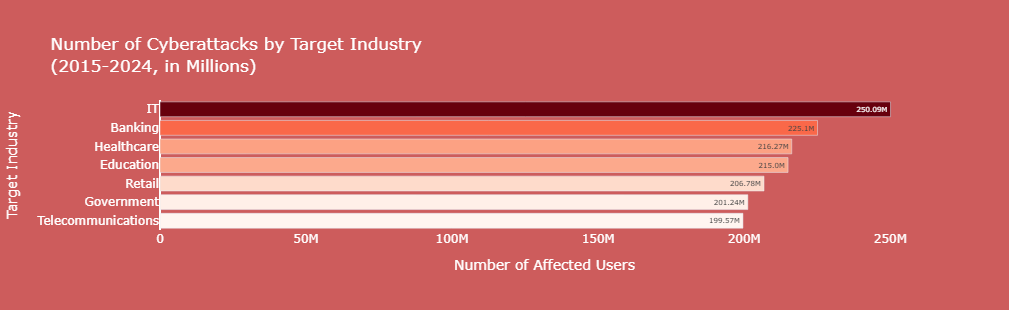

In [230]:
#BAR GRAPH OF NUMBER OF AFFECTED USERS BY INDUSTRY

fig_target_industry_users_total = px.bar(df_target_industry_users_total, x='Number of Affected Users', y='Target Industry', 
                                         title = 'Number of Cyberattacks by Target Industry<br>(2015-2024, in Millions)', 
                                         color='Number of Affected Users', color_continuous_scale = 'Reds', 
                                         text = (df_target_industry_users_total['Number of Affected Users (in Millions)'].apply(lambda x:f"{x}M")),
                                         width = 620, height=310)

fig_target_industry_users_total.update_layout(xaxis=dict(showgrid=False),yaxis=dict(showgrid=False),
                                              coloraxis_showscale=False, plot_bgcolor='IndianRed', paper_bgcolor='IndianRed', 
                                              font=dict(color='white'))
fig_target_industry_users_total.show()

fig_target_industry_users_total.write_image('fig_target_industry_users_total.png')

In [231]:
#DATAFRAME OF NUMBER OF AFFECTED USERS BY INDUSTRY AND CYBERATTACK

df_target_industry_cyberattacktype_users = df.pivot_table(index='Target Industry', columns='Attack Type', values='Number of Affected Users',aggfunc='sum')
df_target_industry_cyberattacktype_users = (df_target_industry_cyberattacktype_users/1e6).round(2)
df_target_industry_cyberattacktype_users

Attack Type,DDoS,Malware,Man-in-the-Middle,Phishing,Ransomware,SQL Injection
Target Industry,,,,,,
Banking,36.66,29.99,41.26,45.95,33.66,37.58
Education,32.67,35.76,36.45,36.66,36.18,37.28
Government,36.31,30.98,26.08,34.96,36.33,36.58
Healthcare,39.06,42.51,32.75,28.69,38.81,34.46
IT,51.05,36.20,42.34,41.11,39.78,39.62
Retail,27.59,36.75,30.86,44.44,36.58,30.55
Telecommunications,41.86,34.57,28.97,25.90,26.56,41.71


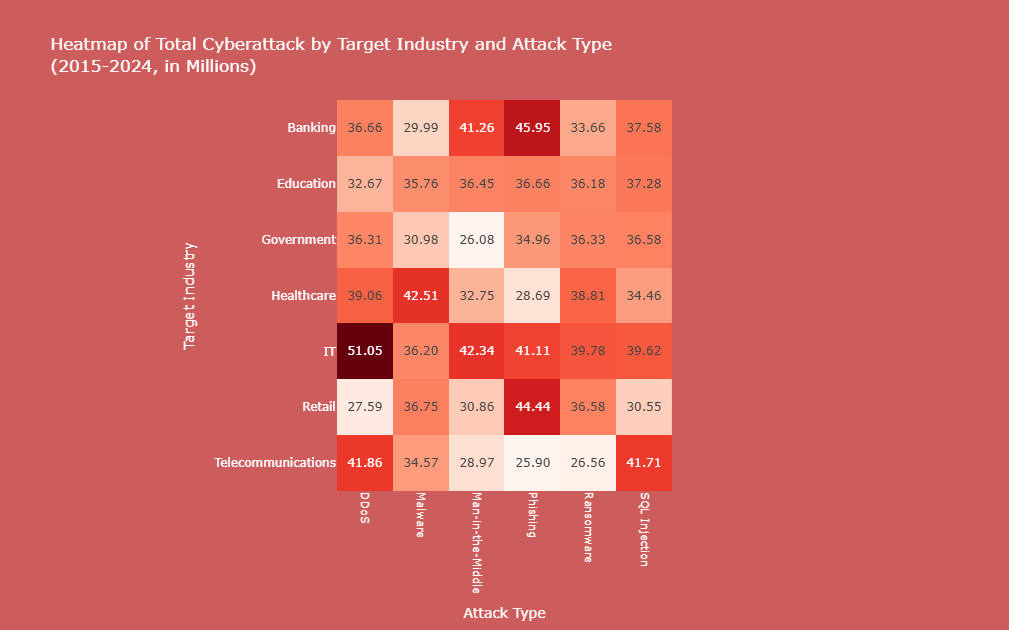

In [232]:
#HEATMAP OF NUMBER OF AFFECTED USERS BY INDUSTRY AND ATTACK TYPE

fig_target_industry_cyberattacktype_users = px.imshow(df_target_industry_cyberattacktype_users.values, 
                                      labels={'x':'Attack Type', 'y':'Target Industry','color':'Number of Affected Users (in Millions)'},
                                      title='Heatmap of Total Cyberattack by Target Industry and Attack Type<br>(2015-2024, in Millions)',
                                          x=df_target_industry_cyberattacktype_users.columns, y=df_target_industry_cyberattacktype_users.index,
                                      color_continuous_scale='Reds', text_auto = '.2f',height=630, width=620)

fig_target_industry_cyberattacktype_users.update_layout(xaxis=dict(tickvals=df_target_industry_cyberattacktype_users.columns,tickfont=dict(size=11), tickangle=90),
                                                 yaxis=dict(tickfont=dict(size=12),title='Target Industry'), coloraxis_showscale=False, 
                                                        plot_bgcolor = 'IndianRed', paper_bgcolor='IndianRed', font=dict(color='white'))


fig_target_industry_cyberattacktype_users.show()

fig_target_industry_cyberattacktype_users.write_image('fig_target_industry_cyberattacktype_users.png')

In [233]:
#CORRELATION OF BETWEEN FINANCIAL LOSS AND NUMBER OF AFFECTED USERS

correlation = df['Financial Loss (in Million $)'].corr(df['Number of Affected Users'])
print(f"Correlation between Financial Loss and Number of Affected Users: {correlation}")

Correlation between Financial Loss and Number of Affected Users: 0.0017867355720258388


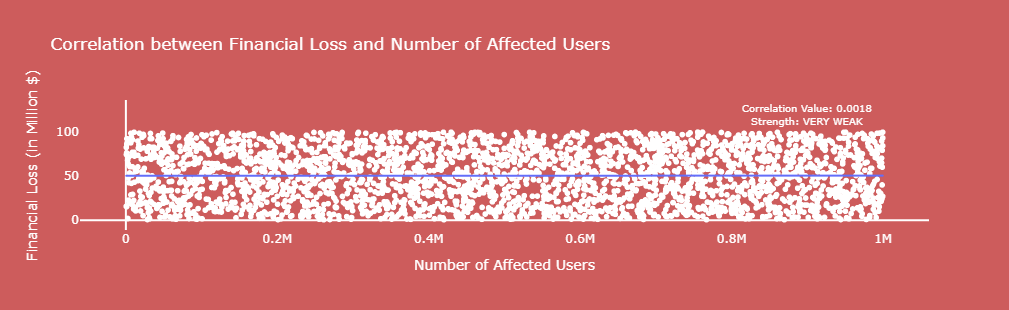

In [234]:


# SCATTER PLOT SHOWIGN THE CORRELATION BETWEEN FINANCIAL LOSS AND NUMBER OF AFFECTED USERS
fig_corr = px.scatter(df, x='Number of Affected Users', y='Financial Loss (in Million $)', trendline='ols', 
                 title='Correlation between Financial Loss and Number of Affected Users', height=310, width=620)

fig_corr.update_traces(selector=dict(mode='markers'), marker=dict(color='white'))

fig_corr.add_annotation(
    x=df['Number of Affected Users'].max() -100000,  # Position on the max X value
    y=df['Financial Loss (in Million $)'].max() +20,  # Position on the max Y value
    text=f"Correlation Value: {correlation:.4f}<br>Strength: VERY WEAK",  # Display correlation value
    showarrow=False,
    font=dict(size=10, color="white")
)


fig_corr.update_layout(plot_bgcolor='IndianRed', paper_bgcolor='IndianRed', 
                       yaxis=dict(title=dict(text='Financial Loss (in Million $)'), showgrid=False),
                       xaxis=dict(showgrid=False),
                       font=dict(color='white'))

# Show the plot
fig_corr.show()

fig_corr.write_image('fig_corr.png')

In [235]:
#DATAFRAME OF NUMBER OF AFFECTED USERS BY COUNTRY

df_country_users_total = df.groupby('Country')['Number of Affected Users'].sum().reset_index()
df_country_users_total['Number of Affected Users (in Millions)'] = (df_country_users_total['Number of Affected Users']/1e6).round(2)
df_country_users_total['Country']= df_country_users_total['Country'].replace({'USA':'United States of America', 'UK':'United Kingdom'})
df_country_users_total

,Country,Number of Affected Users,Number of Affected Users (in Millions)
0,Australia,150011830,150.01
1,Brazil,168806980,168.81
2,China,139580938,139.58
3,France,156229142,156.23
4,Germany,147675358,147.68
5,India,149178659,149.18
6,Japan,148711814,148.71
7,Russia,152191835,152.19
8,United Kingdom,157464983,157.46
9,United States of America,144200870,144.20


In [236]:
#HEATMAP OF TOTAL NUMBER OF AFFECTED USERS BY COUNTRY

import json
import folium

# Step 1: Load GeoJSON data
with open("custom.geo.json", "r", encoding="utf-8") as geojson_file:
    geojson_data = json.load(geojson_file)

# Step 2: Initialize the map
choropleth_map = folium.Map(location=[10, 0], zoom_start=2, tiles="Cartodb Positron")

# Step 3: Add Choropleth layer
folium.Choropleth(
    geo_data=geojson_data,
    data=df_country_users_total,
    columns=["Country", "Number of Affected Users"],
    key_on="feature.properties.name",
    fill_color='Reds',
    nan_fill_color="transparent",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Affected Users (in Millions)"
).add_to(choropleth_map)

# Step 4: Add GeoJSON layer for tooltips
folium.GeoJson(
    geojson_data,
    style_function=lambda x: {
        "fillColor": "transparent",
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["name"],
        aliases=["Country: "],
        localize=True,
    ),
).add_to(choropleth_map)

# Step 5: Define top 10 affected countries
top_10_countries_users = [
    {"name": "Australia", "lat": -25.2744, "lon": 133.7751, "callbox_position": "right", "Number of Affected Users (in Millions)": "150.01M"},
    {"name": "Brazil", "lat": -14.2350, "lon": -51.9253, "callbox_position": "right", "Number of Affected Users (in Millions)": "168.81M"},
    {"name": "China", "lat": 35.8617, "lon": 104.1954, "callbox_position": "left", "Number of Affected Users (in Millions)": "139.58M"},
    {"name": "France", "lat": 46.6034, "lon": 1.8883, "callbox_position": "left", "Number of Affected Users (in Millions)": "156.23M"},
    {"name": "Germany", "lat": 51.1657, "lon": 10.4515, "callbox_position": "right", "Number of Affected Users (in Millions)": "147.68M"},
    {"name": "India", "lat": 20.5937, "lon": 78.9629, "callbox_position": "right", "Number of Affected Users (in Millions)": "149.18M"},
    {"name": "Japan", "lat": 36.2048, "lon": 138.2529, "callbox_position": "right", "Number of Affected Users (in Millions)": "148.71M"},
    {"name": "Russia", "lat": 61.5240, "lon": 105.3188, "callbox_position": "right", "Number of Affected Users (in Millions)": "152.19M"},
    {"name": "United Kingdom", "lat": 55.3781, "lon": -3.4360, "callbox_position": "left", "Number of Affected Users (in Millions)": "157.46M"},
    {"name": "United States of America", "lat": 37.0902, "lon": -95.7129, "callbox_position": "left", "Number of Affected Users (in Millions)": "144.20M"},
]

# Step 6: Add callout boxes and connecting lines
for country in top_10_countries_users:
    offset_lat = country["lat"] + 5
    offset_lon = country["lon"] + (40 if country["callbox_position"] == "right" else -80)

    box_html = f"""
    <div style="
        background-color: white;
        border: 1px solid black;
        border-radius: 5px;
        padding: 10px;
        width: 260px;
        height:30px;
        display:flex;
        align-items:center;
        justify-content: center;
        font-size:14px;
        box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
        <b>{country['name']} ({country['Number of Affected Users (in Millions)']})</b>
    </div>
    """

    folium.Marker(
        location=[offset_lat, offset_lon],
        icon=folium.DivIcon(html=box_html)
    ).add_to(choropleth_map)

    folium.PolyLine(
        locations=[[country["lat"], country["lon"]], [offset_lat, offset_lon]],
        color="black",
        weight=1
    ).add_to(choropleth_map)

# Step 7: Add summary callout box in ocean area
summary_html = """
<div style="background-color: white; border-radius: 10px; padding: 10px; width: 400px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.3);">
    <h4 style="margin: 0; text-align: center; color:dodgerblue;"><b>NUMBER OF AFFECTED USERS BY COUNTRY</b><br>(in Millions)</h4>
    <table style="width: 100%; border-collapse: collapse; font-size: 14px;">
        <thead>
            <tr style="border-bottom: 1px solid #ddd; text-align: left;">
                <th style="width: 15%;">Rank</th>
                <th style="width: 50%;">Country</th>
                <th style="width: 35%;">Users (Millions)</th>
            </tr>
        </thead>
        <tbody>
            <tr><td>1</td><td>Brazil</td><td>168.81M</td></tr>
            <tr><td>2</td><td>United Kingdom</td><td>157.46M</td></tr>
            <tr><td>3</td><td>France</td><td>156.23M</td></tr>
            <tr><td>4</td><td>Russia</td><td>152.19M</td></tr>
            <tr><td>5</td><td>Australia</td><td>150.01M</td></tr>
            <tr><td>6</td><td>India</td><td>149.18M</td></tr>
            <tr><td>7</td><td>Japan</td><td>148.71M</td></tr>
            <tr><td>8</td><td>Germany</td><td>147.68M</td></tr>
            <tr><td>9</td><td>United States of America</td><td>144.20M</td></tr>
            <tr><td>10</td><td>China</td><td>139.58M</td></tr>
        </tbody>
    </table>
</div>
"""

folium.Marker(
    location=[80, 280],
    icon=folium.DivIcon(html=summary_html)
).add_to(choropleth_map)

title_html = """
<div style="background-color: white; border-radius: 10px; padding: 10px; width: 600px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.3);">
    <h3 style="margin: 0; text-align: center; color:indianred;"><b>CHOROPLETH MAP OF CYBERATTACKS BY COUNTRY</b></h3>
"""

folium.Marker(
    location=[110, 15],
    icon=folium.DivIcon(html=title_html)
).add_to(choropleth_map)

# Step 8: Save map
choropleth_map.save("choropleth_map_affected_users.html")
print("Map generated successfully: 'choropleth_map_affected_users.html'")

Map generated successfully: 'choropleth_map_affected_users.html'


**KEY FINDINGS / RESULTS | CYBERATTACK SOURCES AND SECURITY WEAKNESSES**

In [237]:
#DATAFRAME OF TOTAL FINANCIAL LOSS BY ATTACK SOURCE

df_attack_source_finloss_total = df.groupby('Attack Source')['Financial Loss (in Million $)'].sum().sort_values(ascending=False).reset_index()
df_attack_source_finloss_total['Financial Loss'] = (df_attack_source_finloss_total['Financial Loss (in Million $)']*1e6).round(2)
df_attack_source_finloss_total['Financial Loss (in Billion $)'] = (df_attack_source_finloss_total['Financial Loss (in Million $)']/1e3).round(2)
df_attack_source_finloss_total

,Attack Source,Financial Loss (in Million $),Financial Loss,Financial Loss (in Billion $)
0,Nation-state,40497.22,4.049722e+10,40.50
1,Unknown,38810.61,3.881061e+10,38.81
2,Insider,36673.51,3.667351e+10,36.67
3,Hacker Group,35497.57,3.549757e+10,35.50


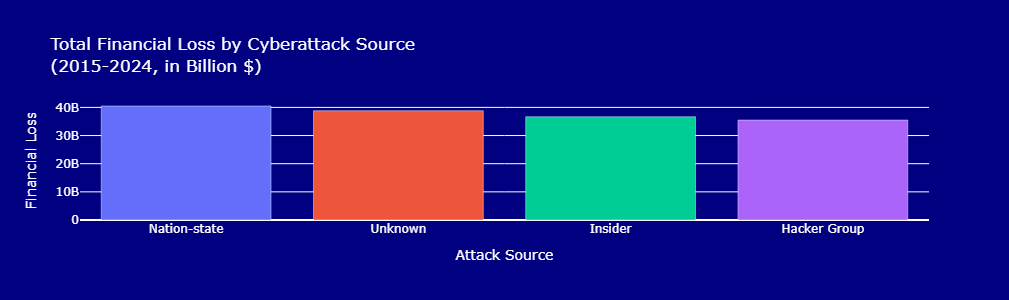

In [238]:
#BAR GRAPH OF TOTAL FINANCIAL LOSS BY ATTACK SOURCE

fig_attack_source_finloss_total = px.bar(df_attack_source_finloss_total, x='Attack Source', y='Financial Loss', 
                                 title='Total Financial Loss by Cyberattack Source<br>(2015-2024, in Billion $)',
                                 color='Attack Source',
                                 height=300, width=620)

fig_attack_source_finloss_total.update_layout(paper_bgcolor='Navy', plot_bgcolor='Navy', font=dict(color='white'), showlegend=False)

fig_attack_source_finloss_total.show()

fig_attack_source_finloss_total.write_image('fig_attack_source_finloss_total.png')

In [239]:
#DATAFRAME OF NUMBER OF AFFECTED USERS BY SECURITY VULNERABILITY


df_security_vulnerability_total = df.groupby('Security Vulnerability Type')['Number of Affected Users'].sum().reset_index()
df_security_vulnerability_total['Number of Affected Users (in Millions)'] = (df_security_vulnerability_total['Number of Affected Users']/1e6).round(2)
df_security_vulnerability_total

,Security Vulnerability Type,Number of Affected Users,Number of Affected Users (in Millions)
0,Social Engineering,374098861,374.10
1,Unpatched Software,364539523,364.54
2,Weak Passwords,379117701,379.12
3,Zero-day,396296324,396.30


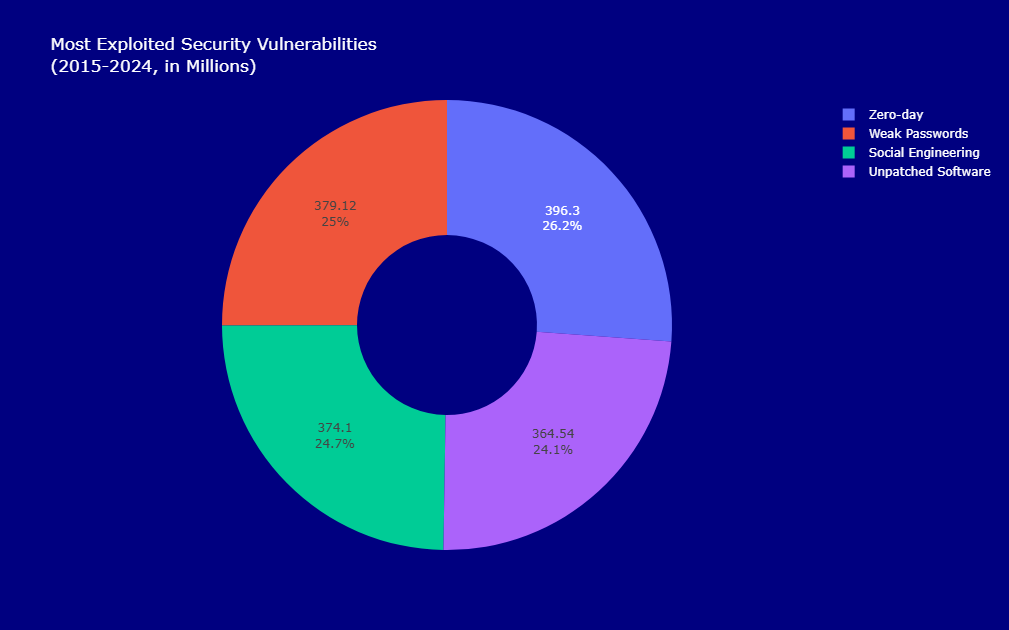

In [240]:
#PIE CHART OF NUMBER OF AFFECTED USERS BY SECURITY VULNERABILITY

fig_security_vulnerability_distribution = px.pie(df_security_vulnerability_total, 
                                                names='Security Vulnerability Type', values='Number of Affected Users (in Millions)', 
                                                title = 'Most Exploited Security Vulnerabilities<br>(2015-2024, in Millions)',
                                                hole=0.4, height=630, width=620)

fig_security_vulnerability_distribution.update_traces(textposition='inside',
                             textinfo='value+percent')

fig_security_vulnerability_distribution.update_layout(plot_bgcolor='Navy', paper_bgcolor='Navy', font=dict(color='white'))
fig_security_vulnerability_distribution.show()

fig_security_vulnerability_distribution.write_image('fig_security_vulnerability_distribution.png')

In [241]:
#DATAFRAME OF AVERAGE REOSLUTION TIME BY DEFENSE MECHANISM AND ATTACK TYPE

df_defense_mechanism_resolution_hmap = df.pivot_table(index='Defense Mechanism Used', columns='Attack Type', values='Incident Resolution Time (in Hours)', aggfunc='mean')
df_defense_mechanism_resolution_hmap = df_defense_mechanism_resolution_hmap.round(2)
df_defense_mechanism_resolution_hmap

Attack Type,DDoS,Malware,Man-in-the-Middle,Phishing,Ransomware,SQL Injection
Defense Mechanism Used,,,,,,
AI-based Detection,35.21,37.23,39.27,38.61,34.89,35.05
Antivirus,37.30,36.55,35.39,37.09,33.79,38.88
Encryption,35.43,40.63,37.37,32.97,40.16,34.70
Firewall,32.33,35.86,36.69,34.26,36.68,38.87
VPN,37.83,35.44,35.67,37.09,37.47,37.09


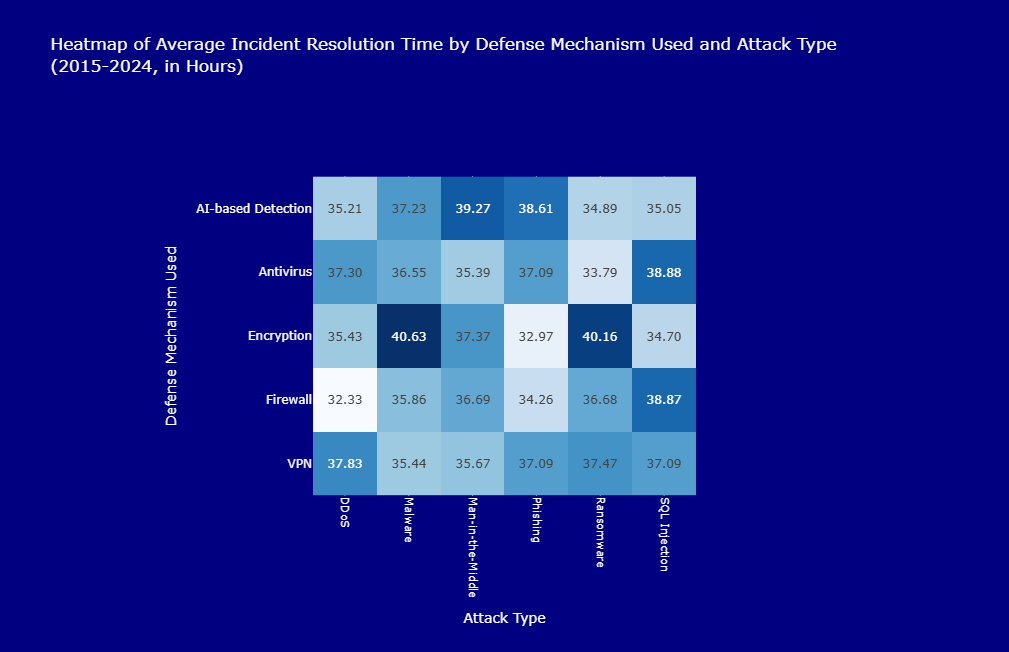

In [242]:
#HEATMAP SHOWING THE AVERAGE RESOLUTION TIME BY DEFENSE MECHANISM AND ATTACK TYPE

fig_defense_mechanism_resolution_hmap = px.imshow(df_defense_mechanism_resolution_hmap.values, 
                                      labels={'x':'Attack Type', 'y':'Defense Mechanism Used','color':'Incident Resolution Time (in Hourse)'},
                                      title='Heatmap of Average Incident Resolution Time by Defense Mechanism Used and Attack Type<br>(2015-2024, in Hours)',
                                          x=df_defense_mechanism_resolution_hmap.columns, y=df_defense_mechanism_resolution_hmap.index,
                                      color_continuous_scale='Blues', text_auto = '.2f',height=630, width=1200)

fig_defense_mechanism_resolution_hmap.update_layout(xaxis=dict(tickvals=df_defense_mechanism_resolution_hmap.columns,tickfont=dict(size=11), tickangle=90),
                                                 yaxis=dict(tickfont=dict(size=12)), coloraxis_showscale=False,
                                          plot_bgcolor='Navy', paper_bgcolor='Navy', font=dict(color='white'))

fig_defense_mechanism_resolution_hmap.show()

fig_defense_mechanism_resolution_hmap.write_image('fig_defense_mechanism_resolution_hmap.png')

In [243]:
#DATAFRAME OF NUMBER OF AFFECTED USERS BY ATTACK TYPE AND COUNTRY

df_country_attacktype_users = df.pivot_table(index='Attack Type', columns='Country', values = 'Number of Affected Users', aggfunc='sum')
df_country_attacktype_users = (df_country_attacktype_users/1e6).round(2)
df_country_attacktype_users

Country,Australia,Brazil,China,France,Germany,India,Japan,Russia,UK,USA
Attack Type,,,,,,,,,,
DDoS,31.68,32.33,25.22,29.04,22.71,21.35,24.21,25.38,24.66,28.61
Malware,33.96,27.53,22.23,22.50,22.59,22.40,27.18,20.04,27.42,20.91
Man-in-the-Middle,22.52,22.47,22.68,20.68,24.84,26.57,25.03,23.95,27.57,22.41
Phishing,22.39,25.05,25.07,30.41,23.82,26.11,25.75,24.01,28.02,27.10
Ransomware,19.18,28.17,23.29,24.46,21.49,26.49,22.02,33.14,23.94,25.71
SQL Injection,20.28,33.26,21.10,29.14,32.22,26.27,24.52,25.66,25.86,19.47


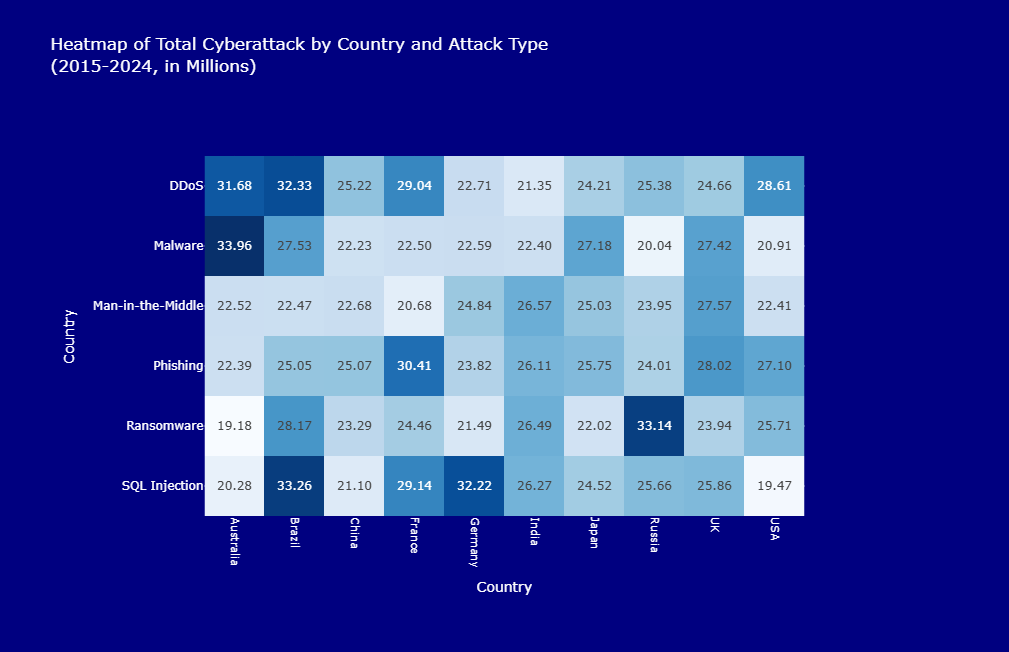

In [244]:
#HEATMAP SHOWING THE NUMBER OF AFFECTED USERS BY ATTACK TYPE AND COUNTRY


fig_country_attacktype_users = px.imshow(df_country_attacktype_users.values, 
                                      labels={'x':'Country', 'y':'Attack Type','color':'Number of Affected Users (in Millions)'},
                                      title='Heatmap of Total Cyberattack by Country and Attack Type<br>(2015-2024, in Millions)',
                                          x=df_country_attacktype_users.columns, y=df_country_attacktype_users.index,
                                      color_continuous_scale='Blues', text_auto = '.2f',height=630, width=1200)

fig_country_attacktype_users.update_layout(xaxis=dict(tickvals=df_country_attacktype_users.columns,tickfont=dict(size=11), tickangle=90),
                                                 yaxis=dict(tickfont=dict(size=12),title='Country'), coloraxis_showscale=False,
                                          plot_bgcolor='Navy', paper_bgcolor='Navy', font=dict(color='white'))

fig_country_attacktype_users.show()

fig_country_attacktype_users.write_image('fig_country_attacktype_users.png')

**KEY FINDINGS / RESULTS | INCIDENT RESPONSE AND PREVENTION STRATEGIES**

In [245]:
#CORRELATION BETWEEN FINANCIAL LOSS AND INCIDENT RESOLUTION TIME
correlation_finloss_resolutiontime = df['Financial Loss (in Million $)'].corr(df['Incident Resolution Time (in Hours)'])
print(f"Correlation between Financial Loss and Incident Resolution Time: {correlation_finloss_resolutiontime}")

Correlation between Financial Loss and Incident Resolution Time: -0.012670791107337306


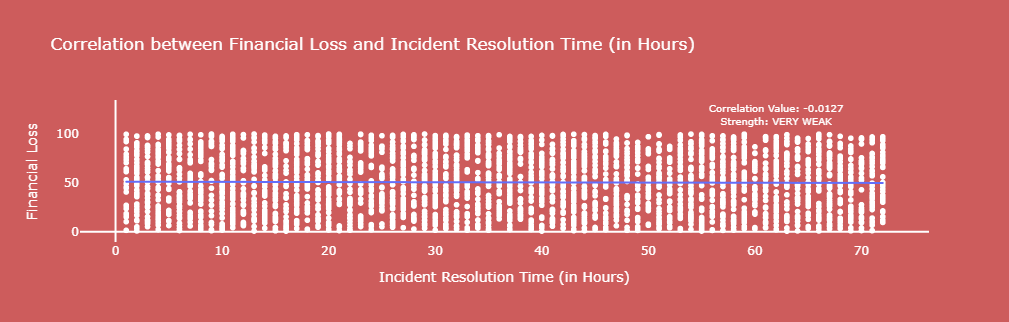

In [246]:
#SCATTER PLOT BETWEEN FINANCIAL LOSS AND INCIDENT RESOLUTION TIME

# Create scatter plot
fig_corr_finlos_resolutiontime = px.scatter(df, x='Incident Resolution Time (in Hours)', y='Financial Loss (in Million $)', trendline='ols', 
                 title='Correlation between Financial Loss and Incident Resolution Time (in Hours)', height=300, width=1250)

fig_corr_finlos_resolutiontime.update_traces(selector=dict(mode='markers'), marker=dict(color='white'))

fig_corr_finlos_resolutiontime.add_annotation(
    x=df['Incident Resolution Time (in Hours)'].max() -10,  # Position on the max X value
    y=df['Financial Loss (in Million $)'].max() +20,  # Position on the max Y value
    text=f"Correlation Value: {correlation_finloss_resolutiontime:.4f}<br>Strength: VERY WEAK",  # Display correlation value
    showarrow=False,
    font=dict(size=10, color="white")
)


fig_corr_finlos_resolutiontime.update_layout(plot_bgcolor='IndianRed', paper_bgcolor='IndianRed', 
                       yaxis=dict(title=dict(text='Financial Loss'), showgrid=False),
                       xaxis=dict(showgrid=False),
                       font=dict(color='white'))


fig_corr_finlos_resolutiontime.show()

fig_corr_finlos_resolutiontime.write_image('fig_corr_finlos_resolutiontime.png')

In [247]:
#DATAFRAME OF AVERAGE RESOLUTION TIME BY INDUSTRY

df_industry_avg_resolution_time = df.groupby('Target Industry')['Incident Resolution Time (in Hours)'].mean().sort_values(ascending=False).reset_index()
df_industry_avg_resolution_time.rename(columns={'Incident Resolution Time (in Hours)':'Average Incident Resolution Time (in Hours)'}, inplace=True)
df_industry_avg_resolution_time

,Target Industry,Average Incident Resolution Time (in Hours)
0,Government,37.593052
1,Retail,37.219858
2,Telecommunications,37.062035
3,IT,36.169456
4,Education,35.906921
5,Healthcare,35.806527
6,Banking,35.737079


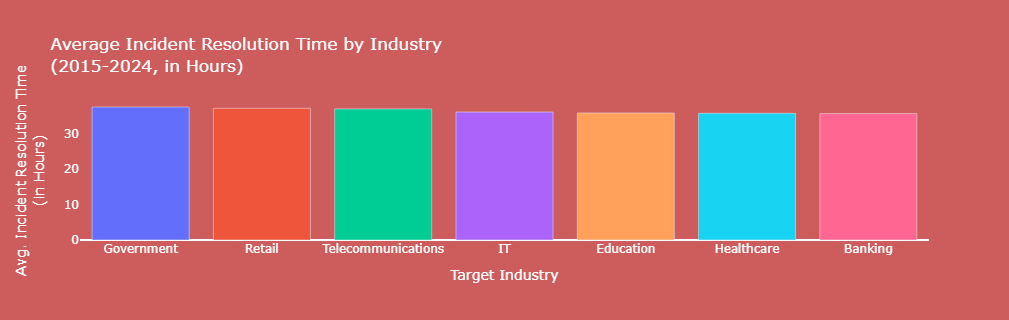

In [248]:
#BAR GRAPH OF AVERAGE INCIDENT RESOLUTION TIME BY INDUSTRY

fig_industry_avg_resolution_time = px.bar(df_industry_avg_resolution_time, x='Target Industry', y='Average Incident Resolution Time (in Hours)', 
                                          title = 'Average Incident Resolution Time by Industry<br>(2015-2024, in Hours)',
                                          color = 'Target Industry', height=320, width=620)

fig_industry_avg_resolution_time.update_layout(showlegend=False, plot_bgcolor='IndianRed', paper_bgcolor='IndianRed',
                                               yaxis=dict(showgrid=False, title=dict(text='Avg. Incident Resolution Time<br>(in Hours)')),
                                               xaxis=dict(showgrid=False), 
                                               font=dict(color='white'))

fig_industry_avg_resolution_time.show()

fig_industry_avg_resolution_time.write_image('fig_industry_avg_resolution_time.png')

In [249]:
#DATAFRAME OF AVERAGE RESOLUTION TIME BY COUNTRY

df_country_avg_resolution_time = df.groupby('Country')['Incident Resolution Time (in Hours)'].mean().sort_values(ascending=False).reset_index()
df_country_avg_resolution_time.rename(columns={'Incident Resolution Time (in Hours)':'Average Incident Resolution Time (in Hours)'}, inplace=True)
df_country_avg_resolution_time

,Country,Average Incident Resolution Time (in Hours)
0,Brazil,37.761290
1,China,37.398577
2,Japan,37.098361
3,UK,36.925234
4,Australia,36.481481
5,France,36.216393
6,Germany,36.017182
7,India,35.931818
8,Russia,35.535593
9,USA,35.306620


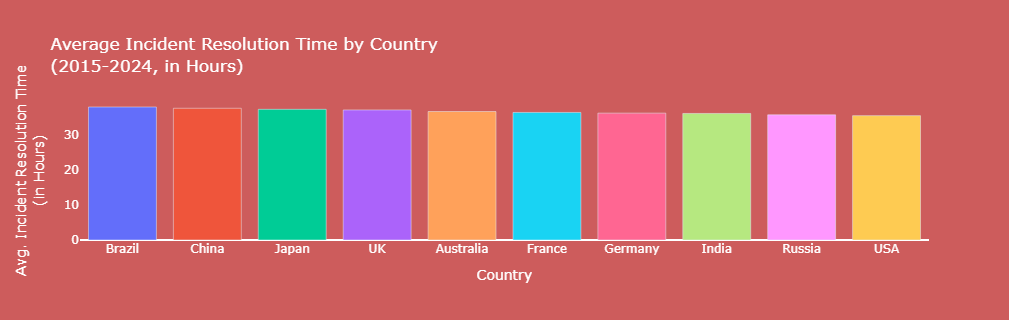

In [250]:
#BAR GRAPH OF AVERAGE RESOLUTION TIME BY COUNTRY

fig_country_avg_resolution_time = px.bar(df_country_avg_resolution_time, x='Country', y='Average Incident Resolution Time (in Hours)', 
                                          title = 'Average Incident Resolution Time by Country<br>(2015-2024, in Hours)',
                                          color = 'Country', height=320, width=620)

fig_country_avg_resolution_time.update_layout(showlegend=False, plot_bgcolor='IndianRed', paper_bgcolor='IndianRed',
                                               xaxis=dict(showgrid=False),
                                               yaxis=dict(showgrid=False, title=dict(text='Avg. Incident Resolution Time<br>(in Hours)')), 
                                               font=dict(color='white'))

fig_country_avg_resolution_time.show()

fig_country_avg_resolution_time.write_image('fig_country_avg_resolution_time.png')

In [251]:
#DATAFRAME OF TOTAL FINANCIAL LOSSS BY DEFENSE MECHANISM AND YEAR

df_defensemech_finloss = df.pivot_table(index='Defense Mechanism Used', columns ='Year', values='Financial Loss (in Million $)', aggfunc='sum')

#Convert to Billion $
df_defensemech_finloss = (df_defensemech_finloss/1e3).round(2)
df_defensemech_finloss

Year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Defense Mechanism Used,,,,,,,,,,
AI-based Detection,3.19,2.54,3.84,2.17,1.79,3.20,3.31,3.54,3.30,2.47
Antivirus,2.73,2.94,3.29,3.85,2.49,3.32,4.00,2.85,3.39,3.62
Encryption,2.89,2.99,3.22,3.09,2.49,3.34,2.90,3.43,2.93,2.55
Firewall,2.72,2.67,3.21,2.89,2.98,2.93,2.61,2.79,3.36,2.93
VPN,2.98,2.81,2.70,2.72,3.39,2.97,3.05,3.27,2.98,3.87


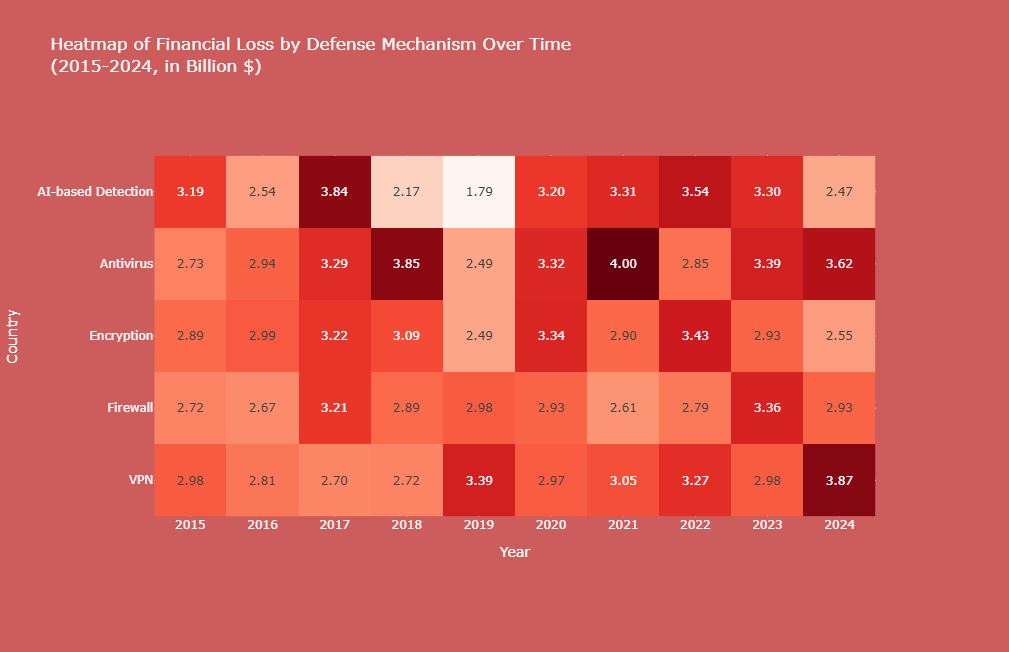

In [252]:
#HEATMAP SHOWING THE TOTAL FINANCIAL LOSS BY DEFENSE MECHANISM AND YEAR

fig_defensemech_finloss = px.imshow(df_defensemech_finloss.values, 
                                    labels={'x':'Year', 'y':'Defense Mechanism Used','color':'Financial Loss (in Million $)'},
                                    title='Heatmap of Financial Loss by Defense Mechanism Over Time<br>(2015-2024, in Billion $)',
                                    x=df_defensemech_finloss.columns, y=df_defensemech_finloss.index,
                                    color_continuous_scale='Reds', text_auto = '.2f',height=630, width=1200)

fig_defensemech_finloss.update_layout(yaxis=dict(tickfont=dict(size=12),title='Country'), coloraxis_showscale=False,
                                          plot_bgcolor='IndianRed', paper_bgcolor='IndianRed', font=dict(color='white'))

fig_defensemech_finloss.show()

fig_defensemech_finloss.write_image('fig_defensemech_finloss.png')